In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
MAX_FEATURES = 10000
MAXLEN = 500
BATCH_SIZE = 32

In [3]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=MAX_FEATURES)
print("raw train_x.shape = {}".format(train_x.shape))
print("raw train_y.shape = {}".format(train_y.shape))

train_x = sequence.pad_sequences(train_x, MAXLEN)
test_x = sequence.pad_sequences(test_x, MAXLEN)
print("padded train_x.shape = {}".format(train_x.shape))
print("padded test_x.shape = {}".format(test_x.shape))

raw train_x.shape = (25000,)
raw train_y.shape = (25000,)
padded train_x.shape = (25000, 500)
padded test_x.shape = (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(MAX_FEATURES, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(
    train_x, train_y, epochs=10, batch_size=128, 
    validation_split=0.2,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 16s - loss: 0.6453 - acc: 0.6126 - val_loss: 0.5235 - val_acc: 0.7646
Epoch 2/10
 - 16s - loss: 0.4283 - acc: 0.8161 - val_loss: 0.4723 - val_acc: 0.7978
Epoch 3/10
 - 16s - loss: 0.3132 - acc: 0.8755 - val_loss: 0.3790 - val_acc: 0.8310
Epoch 4/10
 - 16s - loss: 0.2409 - acc: 0.9076 - val_loss: 0.4314 - val_acc: 0.8130
Epoch 5/10
 - 15s - loss: 0.2038 - acc: 0.9224 - val_loss: 0.3806 - val_acc: 0.8604
Epoch 6/10
 - 15s - loss: 0.1511 - acc: 0.9449 - val_loss: 0.3745 - val_acc: 0.8626
Epoch 7/10
 - 16s - loss: 0.1113 - acc: 0.9598 - val_loss: 0.4319 - val_acc: 0.8368
Epoch 8/10
 - 16s - loss: 0.0768 - acc: 0.9756 - val_loss: 0.5252 - val_acc: 0.8090
Epoch 9/10
 - 16s - loss: 0.0525 - acc: 0.9834 - val_loss: 0.5281 - val_acc: 0.8304
Epoch 10/10
 - 16s - loss: 0.0331 - acc: 0.9899 - val_loss: 0.6326 - val_acc: 0.7990


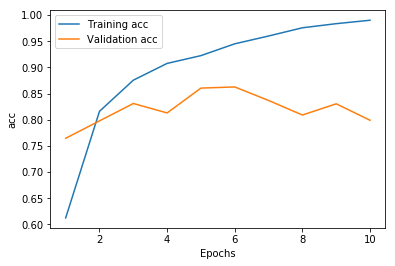

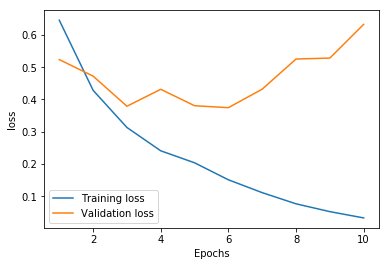

In [6]:
plot_history(history, metrics=('acc', 'loss'))